In [2]:
# import math
import pylab

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from scipy.stats import skew
from scipy.stats.mstats import winsorize
# from scipy.stats import percentileofscore
from scipy.stats import boxcox
# from sklearn.preprocessing import normalize
from scipy import stats

In [3]:
# Load the dataset, variable names must be defined as they are not included in a header row
df_raw = pd.read_csv("adult.data",sep=",", names=["age","workclass","fnlwgt","education","education_num",
    "marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week",
    "native_country","income"],index_col=False)

In [4]:
# The imported data had leading and trailining spaces in categorical columns, strip them off
for col in df_raw.select_dtypes(include=["object","category"]).columns:
    df_raw[col] = df_raw[col].str.strip()

In [5]:
plt_df = df_raw.select_dtypes(exclude=["object","category"]).iloc[:,1:]

# Create a dict to store columns and winsorization cutoff values
winsorize_vals = dict(
    fnlwgt=(0.05,0.05),
    education_num=(0.05,0.05),
    capital_gain=(0.10,0.10),
    capital_loss=(0.05,0.05),
    hours_per_week=(0.20,0.20)
)

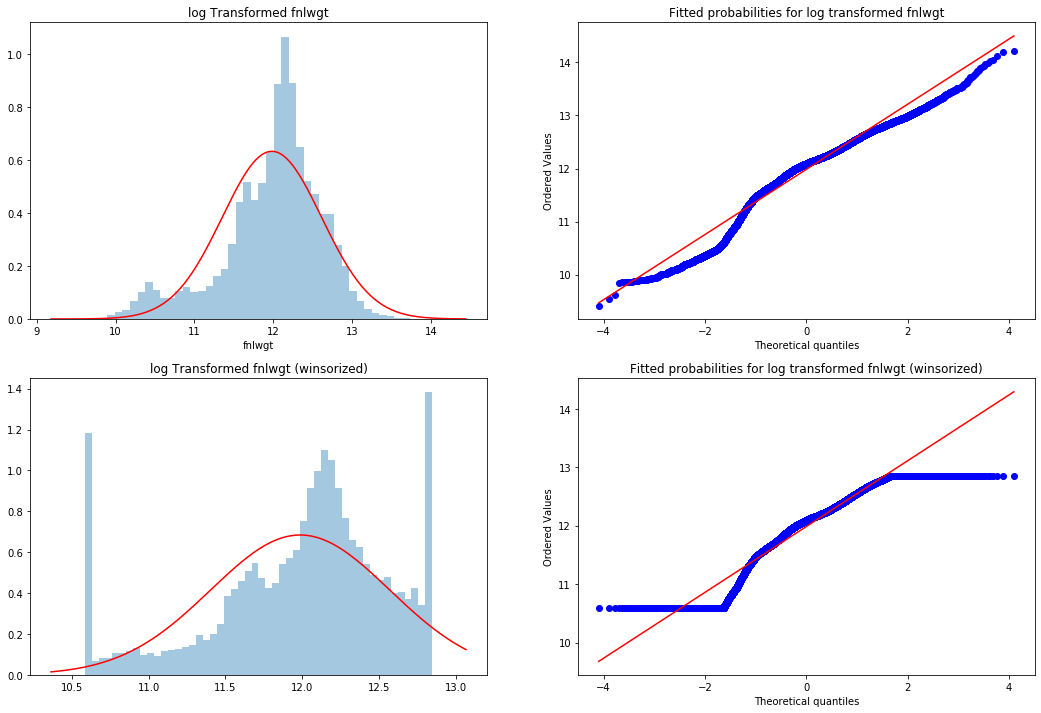

In [6]:
# Take a look at the distribution of a log transfomed fnlwgt variable 
# fnlwgt_log = np.log(winsorize(plt_df["fnlwgt"], winsorize_vals["fnlwgt"]))
fnlwgt_log = np.log(plt_df["fnlwgt"])
winsorized_fnlwgt_log = winsorize(fnlwgt_log,winsorize_vals["fnlwgt"])

plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
sns.distplot(fnlwgt_log,fit=stats.norm, kde=False, fit_kws=dict(color="r"))
plt.title(f"log Transformed fnlwgt")

plt.subplot(2,2,2)
stats.probplot(fnlwgt_log, dist="norm", plot=pylab)
plt.title(f"Fitted probabilities for log transformed fnlwgt")

plt.subplot(2,2,3)
sns.distplot(winsorized_fnlwgt_log,fit=stats.norm, kde=False, fit_kws=dict(color="r"))
plt.title(f"log Transformed fnlwgt (winsorized)")

plt.subplot(2,2,4)
stats.probplot(winsorized_fnlwgt_log, dist="norm", plot=pylab)
plt.title(f"Fitted probabilities for log transformed fnlwgt (winsorized)")

pylab.show();

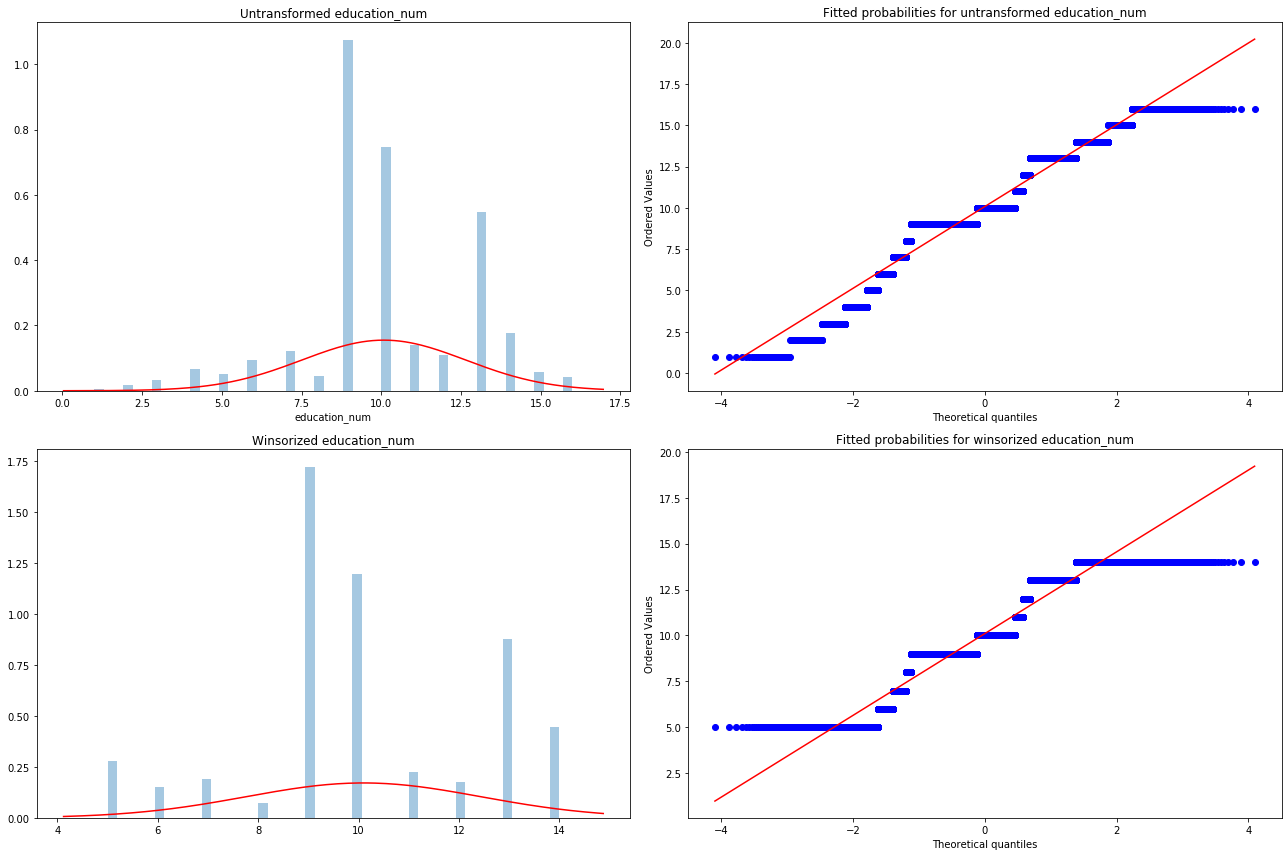

In [7]:
# Take a look at the distribution of the education_num vs the normal curve
untransformed_education_num = plt_df["education_num"]
identity_trans_education_num = winsorize(plt_df["education_num"],winsorize_vals["education_num"])

plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
sns.distplot(untransformed_education_num,fit=stats.norm, kde=False, fit_kws=dict(color="r"))
plt.title(f"Untransformed education_num")

plt.subplot(2,2,2)
stats.probplot(untransformed_education_num, dist="norm", plot=pylab)
plt.title(f"Fitted probabilities for untransformed education_num")

plt.subplot(2,2,3)
sns.distplot(identity_trans_education_num,fit=stats.norm, kde=False, fit_kws=dict(color="r"))
plt.title(f"Winsorized education_num")

plt.subplot(2,2,4)
stats.probplot(identity_trans_education_num, dist="norm", plot=pylab)
plt.title(f"Fitted probabilities for winsorized education_num")

# pylab.show()
plt.tight_layout()
plt.show();

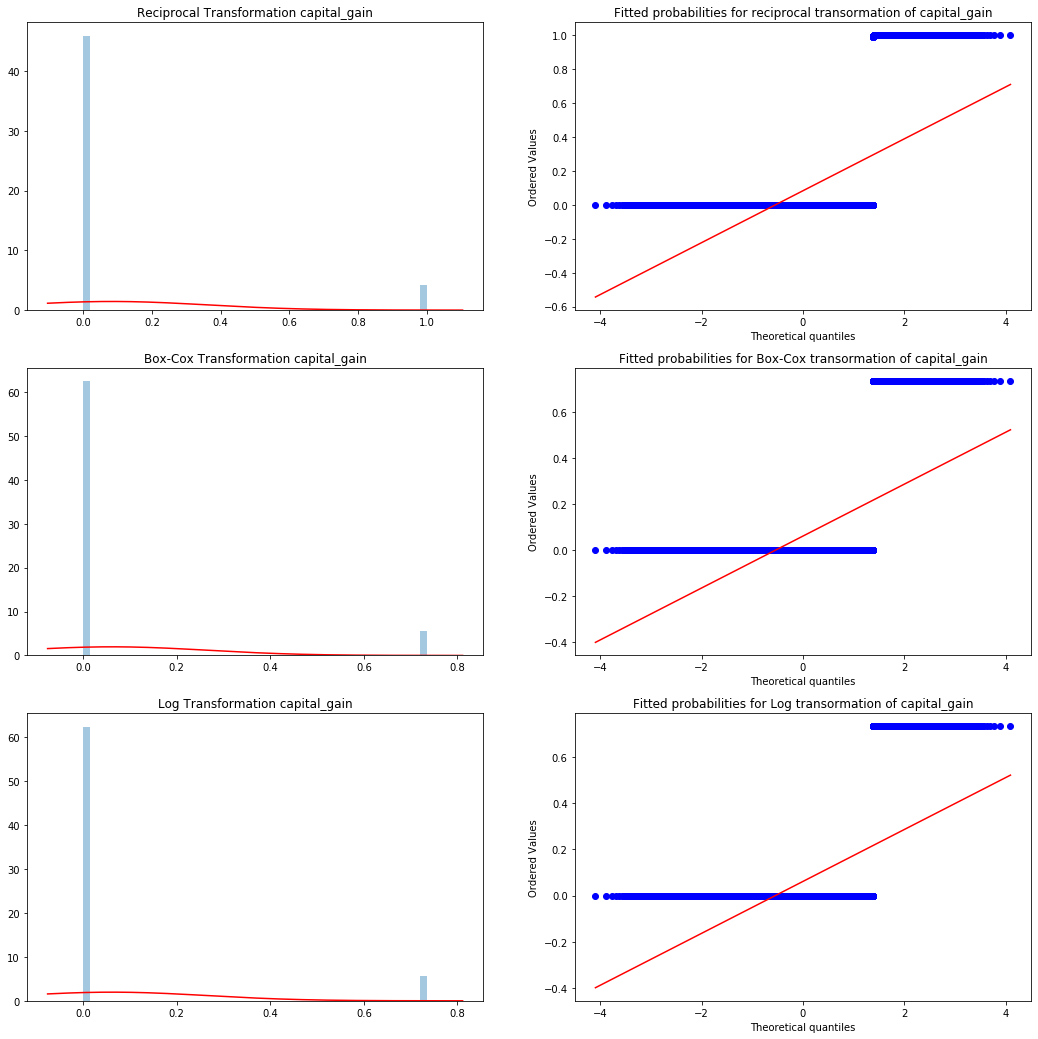

In [8]:
# Take a look at the distribution of an inverse (reciprocal) transformation of capital_gain
# recip_cap_gain = -1/(plt_df["capital_gain"]+1) # reciprocal transformation
recip_cap_gain = stats.boxcox((plt_df["capital_gain"]+1),lmbda=-1.0) # reciprocal transformation 
x_bc, _ = stats.boxcox((plt_df["capital_gain"]+1)) # box-cox transformation
# log_cap_gain = np.log((plt_df["capital_gain"]+1)) # log transformation
log_cap_gain = stats.boxcox((plt_df["capital_gain"]+1)) # log transformation

plt.figure(figsize=(18,18))

plt.subplot(3,2,1)
sns.distplot(recip_cap_gain, fit=stats.norm, kde=False, fit_kws=dict(color="r"))
plt.title(f"Reciprocal Transformation capital_gain")

plt.subplot(3,2,2)
stats.probplot(recip_cap_gain, dist="norm", plot=pylab)
plt.title(f"Fitted probabilities for reciprocal transormation of capital_gain")

plt.subplot(3,2,3)
sns.distplot(x_bc, fit=stats.norm, kde=False, fit_kws=dict(color="r"))
plt.title(f"Box-Cox Transformation capital_gain")

plt.subplot(3,2,4)
stats.probplot(x_bc, dist="norm", plot=pylab)
plt.title(f"Fitted probabilities for Box-Cox transormation of capital_gain")

plt.subplot(3,2,5)
sns.distplot(x_bc, fit=stats.norm, kde=False, fit_kws=dict(color="r"))
plt.title(f"Log Transformation capital_gain")

plt.subplot(3,2,6)
stats.probplot(x_bc, dist="norm", plot=pylab)
plt.title(f"Fitted probabilities for Log transormation of capital_gain")

plt.show();

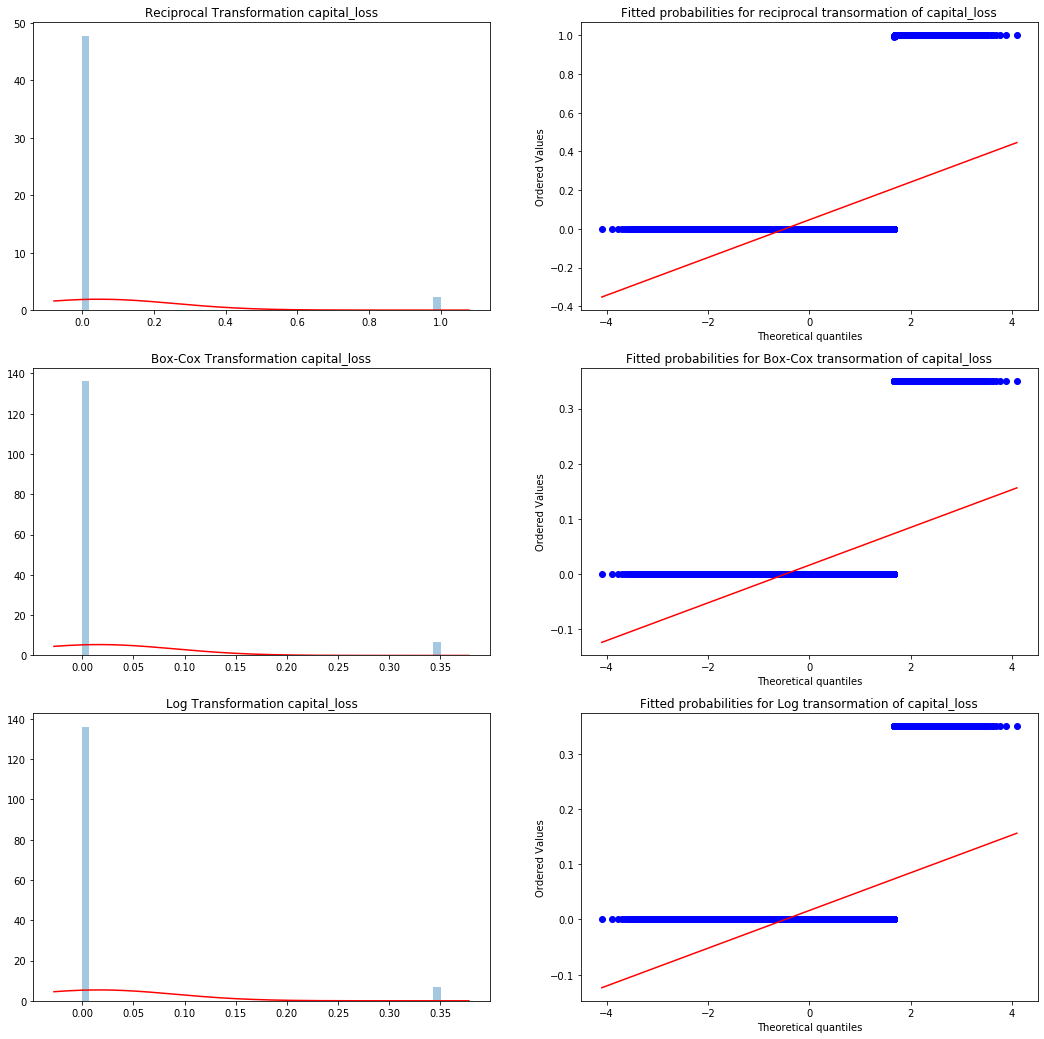

In [9]:
# Take a look at the distribution of an inverse (reciprocal) transformation of capital_loss
# recip_cap_gain = -1/(plt_df["capital_loss"]+1) # reciprocal transformation
recip_cap_gain = stats.boxcox((plt_df["capital_loss"]+1),lmbda=-1.0) # reciprocal transformation 
x_bc, _ = stats.boxcox((plt_df["capital_loss"]+1)) # box-cox transformation
# log_cap_gain = np.log((plt_df["capital_loss"]+1)) # log transformation
log_cap_gain = stats.boxcox((plt_df["capital_loss"]+1)) # log transformation

plt.figure(figsize=(18,18))

plt.subplot(3,2,1)
sns.distplot(recip_cap_gain, fit=stats.norm, kde=False, fit_kws=dict(color="r"))
plt.title(f"Reciprocal Transformation capital_loss")

plt.subplot(3,2,2)
stats.probplot(recip_cap_gain, dist="norm", plot=pylab)
plt.title(f"Fitted probabilities for reciprocal transormation of capital_loss")

plt.subplot(3,2,3)
sns.distplot(x_bc, fit=stats.norm, kde=False, fit_kws=dict(color="r"))
plt.title(f"Box-Cox Transformation capital_loss")

plt.subplot(3,2,4)
stats.probplot(x_bc, dist="norm", plot=pylab)
plt.title(f"Fitted probabilities for Box-Cox transormation of capital_loss")

plt.subplot(3,2,5)
sns.distplot(x_bc, fit=stats.norm, kde=False, fit_kws=dict(color="r"))
plt.title(f"Log Transformation capital_loss")

plt.subplot(3,2,6)
stats.probplot(x_bc, dist="norm", plot=pylab)
plt.title(f"Fitted probabilities for Log transormation of capital_loss")

plt.show();

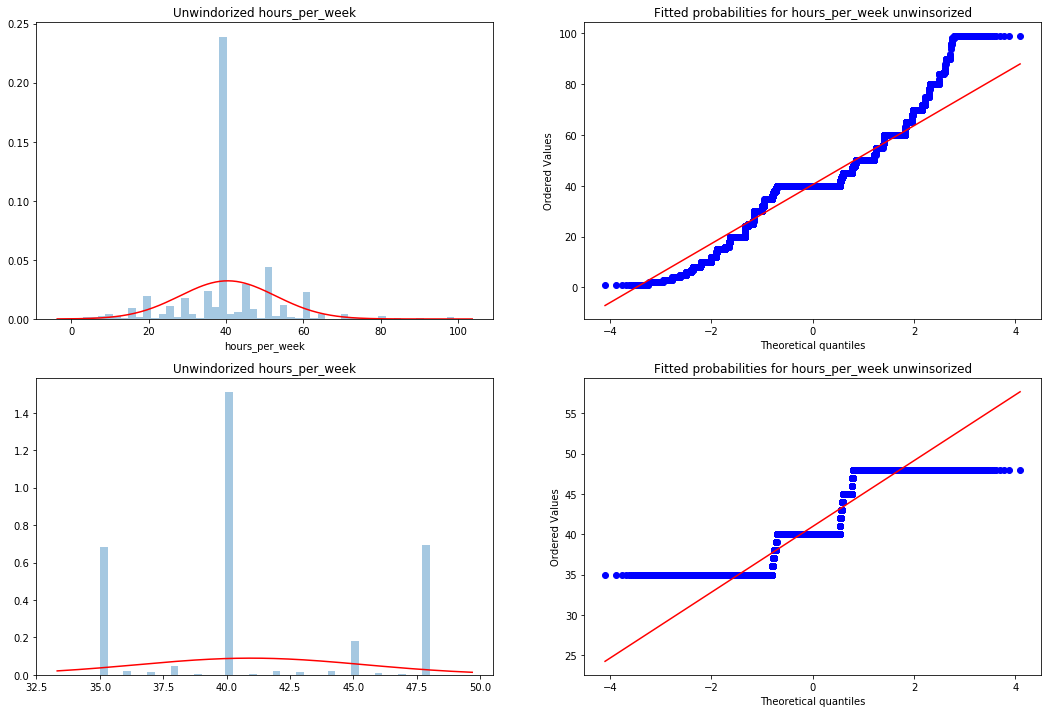

In [13]:
# Take a look at the unwinsorized and winsorized distribution for hours_per_week
hours_per_week = plt_df["hours_per_week"]
hours_per_week_winsorized = winsorize(plt_df["hours_per_week"], winsorize_vals["hours_per_week"])

plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
sns.distplot(hours_per_week, fit=stats.norm, kde=False, fit_kws=dict(color="r"))
plt.title(f"Unwindorized hours_per_week")

plt.subplot(2,2,2)
stats.probplot(hours_per_week, dist="norm", plot=pylab)
plt.title(f"Fitted probabilities for hours_per_week unwinsorized")

plt.subplot(2,2,3)
sns.distplot(hours_per_week_winsorized, fit=stats.norm, kde=False, fit_kws=dict(color="r"))
plt.title(f"Unwindorized hours_per_week")

plt.subplot(2,2,4)
stats.probplot(hours_per_week_winsorized, dist="norm", plot=pylab)
plt.title(f"Fitted probabilities for hours_per_week unwinsorized")

plt.show()

In [16]:
df_raw.select_dtypes(include=["object"]).columns[:-1]

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object')

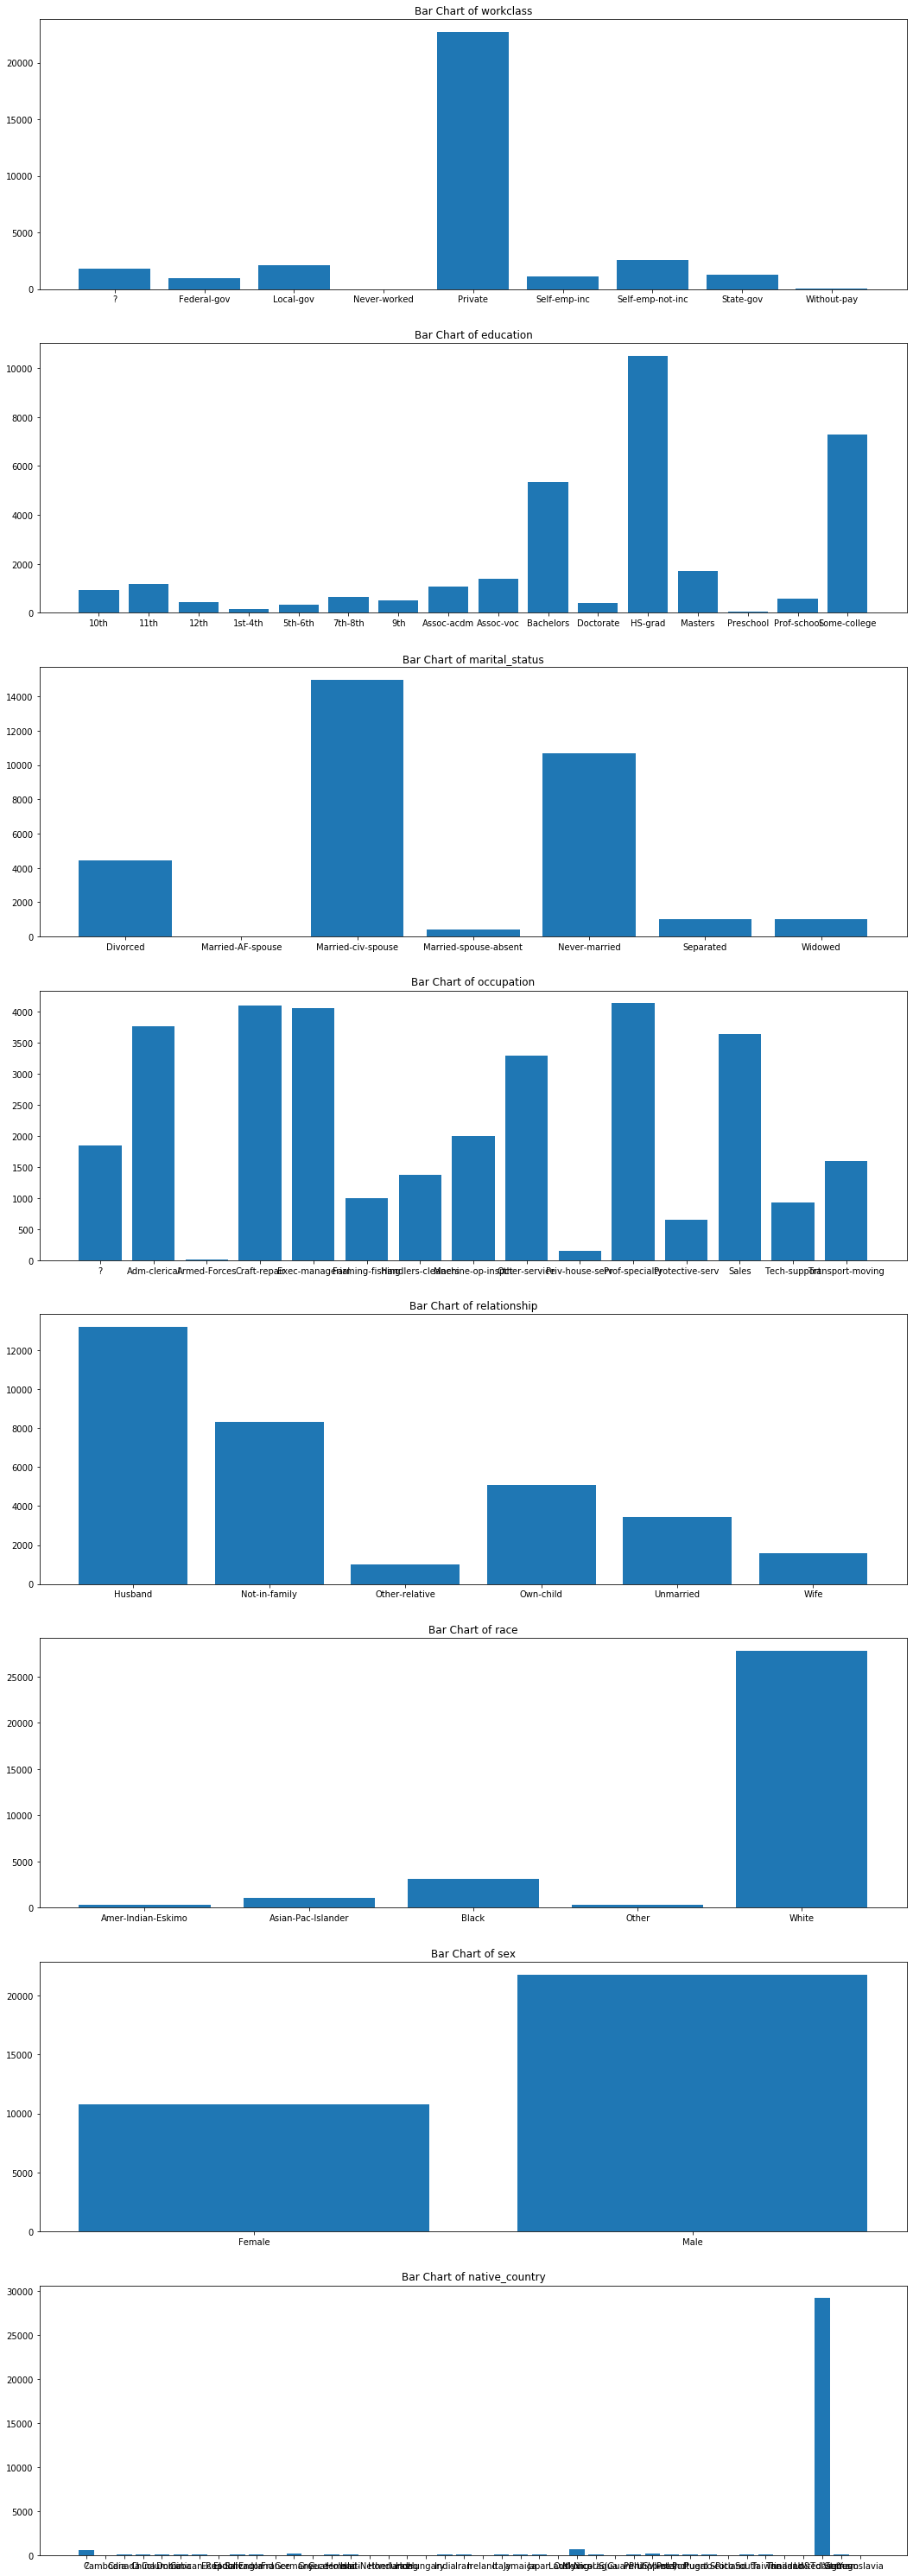

In [21]:
# Take a look at the frequency distributions of the categorical variables
plt.figure(figsize=(18,54))

for i, col in enumerate(df_raw.select_dtypes(include=["object"]).columns[:-1], start=1):
    plt.subplot(8,1,i)
    plt.bar(
        df_raw.groupby(f"{col}")[f"{col}"].count().index,
        df_raw.groupby(f"{col}")[f"{col}"].count()
    )
    
    plt.title(f"Bar Chart of {col}")
    
plt.show();

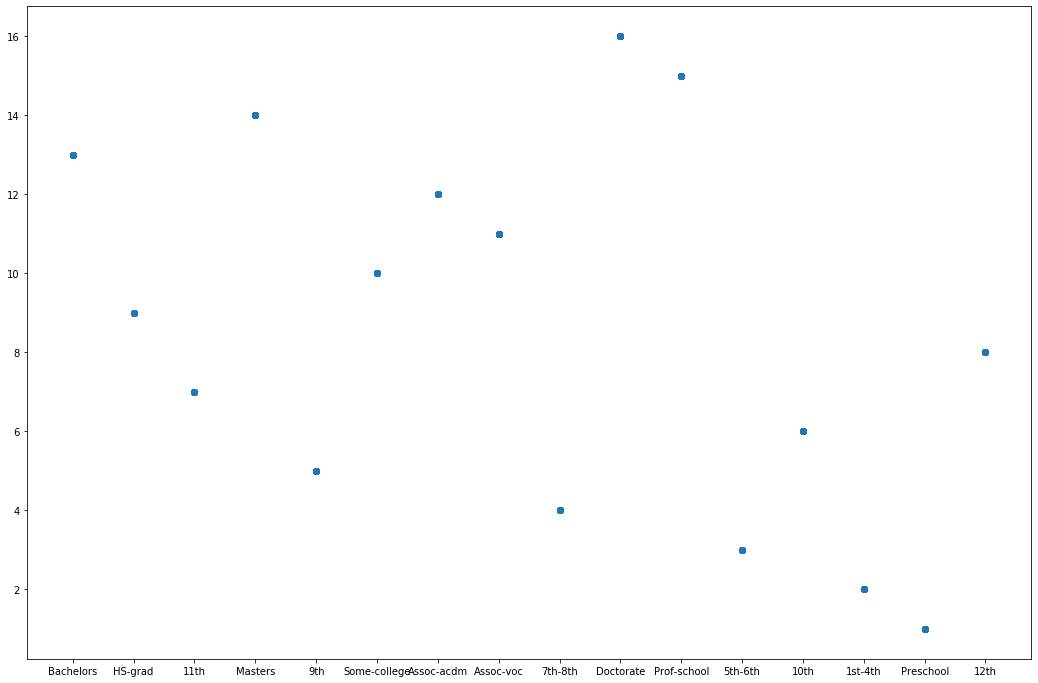

In [42]:
plt.figure(figsize=(18,12))

plt.scatter(
    df_raw["education"], 
    df_raw["education_num"]
)

plt.show()

In [48]:
df_raw.groupby("education_num")[["education_num","education"]].corr().unstack().iloc[:1]

,education_num
,education_num
education_num,
1,NaN
